In [ ]:
%%capture
%matplotlib inline
import os
import sys
import importlib
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import requests
from PIL import Image, ImageEnhance
from csv import reader
from apps.testing.image_process import pre_process
from tqdm.notebook import tqdm
tqdm().pandas()

base_folder='/Users/lorneluo/lorne/poolhub/'

In [117]:
importlib.reload(pre_process)

csv_name = "th.csv"
df=pre_process.process_stripe_image(csv_name)
print(df)

  0%|          | 0/31 [00:00<?, ?it/s]

             file_path  white_balance_y  white_balance_x  color_y  color_x  \
0   data/File_031.jpeg              346              134      347      108   
1   data/File_021.jpeg             2140              526     2146      434   
2   data/File_032.jpeg              350              130      351      106   
3   data/File_026.jpeg             1946              406     1966      300   
4   data/File_006.jpeg             2016              522     2016      426   
5   data/File_019.jpeg             1920              556     1924      454   
6   data/File_009.jpeg             1910              522     1910      388   
7   data/File_017.jpeg             2112              588     2118      492   
8   data/File_014.jpeg             1990              458     2026      338   
9   data/File_011.jpeg             1946              500     1946      404   
10  data/File_024.jpeg             1970              500     1978      398   
11  data/File_022.jpeg             1962              492     197

In [ ]:
importlib.reload(pre_process)

with open('th.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    next(csv_reader, None)  # skip the headers
    for row in csv_reader:
        # print(row)
        file_path,wb_x,wb_y,color_x,color_y,value,_,_,_=row
        color_pos=(int(color_x), int(color_y))
        wb_pos=(int(wb_x), int(wb_y))
        path=os.path.join(base_folder,file_path)
        # print(path,wb_pos,color_pos)
        image = Image.open(path)
        white_balanced_image = pre_process.white_balance(image,wb_pos)
        wb_color=pre_process.pick_average_color(white_balanced_image,wb_pos,(16,16))
        th_color=pre_process.pick_average_color(white_balanced_image,color_pos,(16,16))
        print(value,':',th_color,',')
        # plt.imshow(image)
        # plt.imshow(pre_process.crop_area(white_balanced_image,color_pos,(32,32)))

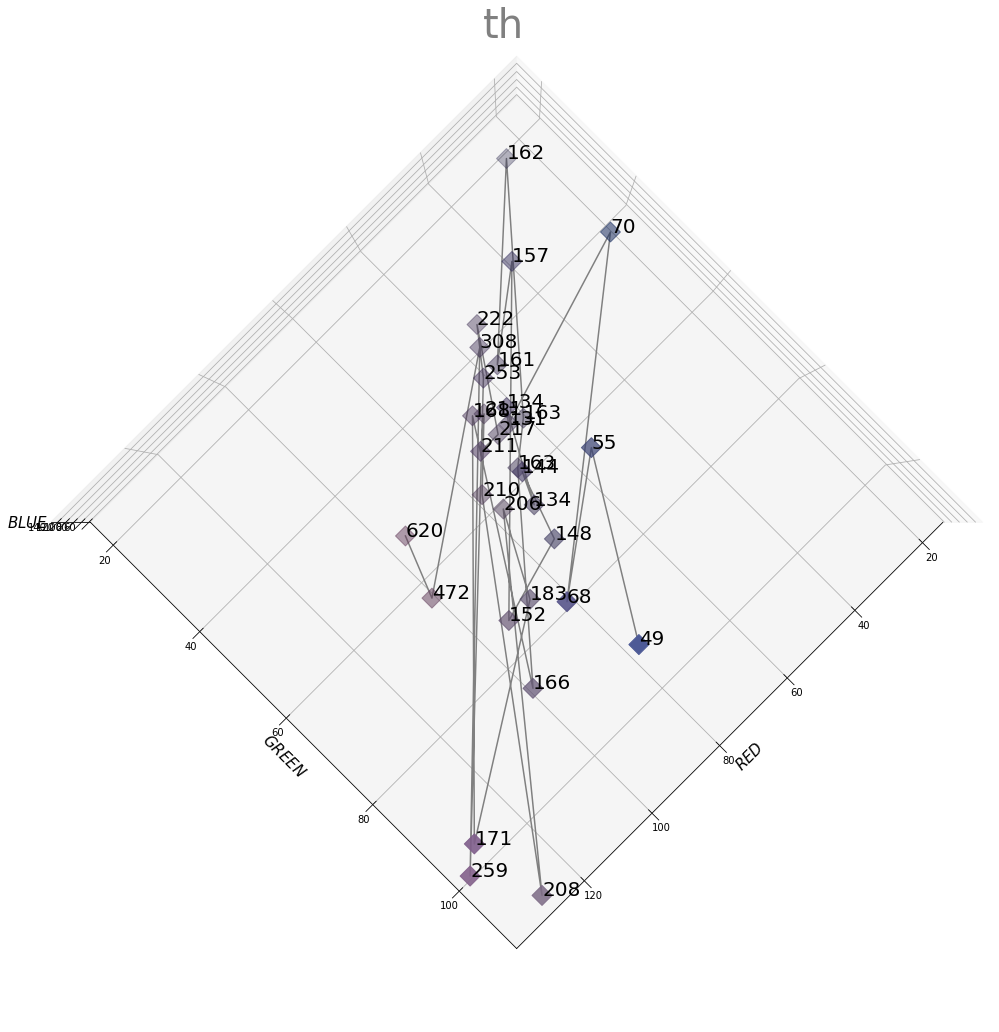

In [162]:
importlib.reload(pre_process)

pre_process.scatter_chart('th',df,90,45)